In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

In [3]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
import torch.optim as optim
from torchvision import models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import random
import warnings
warnings.filterwarnings("ignore")
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from sklearn.metrics import roc_curve, auc

In [4]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 64
train_dataset = datasets.ImageFolder('/kaggle/input/cat-and-dog/training_set/training_set', transform = train_transform)
test_dataset = datasets.ImageFolder('/kaggle/input/cat-and-dog/test_set/test_set', transform = test_transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

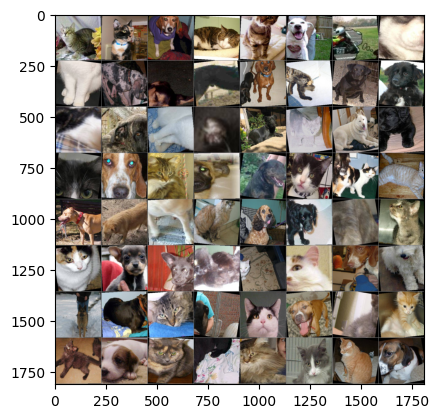

Cat   Cat   Dog   Cat   Cat   Dog   Dog   Dog   Cat   Dog   Dog   Dog   Dog   Cat   Dog   Dog   Cat   Dog   Cat   Cat   Dog   Cat   Dog   Dog   Cat   Dog   Cat   Dog   Dog   Cat   Cat   Cat   Dog   Dog   Dog   Cat   Dog   Dog   Cat   Cat   Cat   Dog   Dog   Cat   Cat   Cat   Dog   Dog   Dog   Dog   Cat   Dog   Cat   Dog   Cat   Cat   Cat   Dog   Cat   Dog   Cat   Cat   Cat   Dog  


In [5]:
classes = ['Cat', 'Dog']
def imshow(image):
    image = image / 2 + 0.5
    npimg = image.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
images, labels = next(iter(train_loader))
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

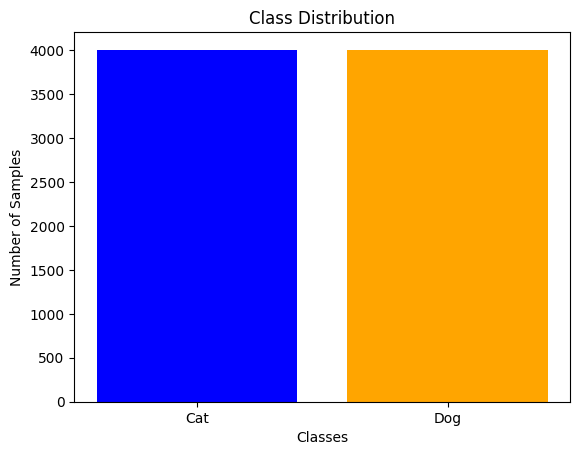

In [16]:
import matplotlib.pyplot as plt
def plot_class_distribution(dataset, classes):
    class_counts = {class_name: 0 for class_name in classes}
    
    for _, label in dataset:
        class_counts[classes[label]] += 1

    sorted_classes = sorted(classes)
    colors = ['blue','orange']
    plt.bar(sorted_classes, [class_counts[class_name] for class_name in sorted_classes], color=colors)
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.title('Class Distribution')
    plt.show()

plot_class_distribution(train_dataset, classes)

Epoch 1/10, Train Accuracy: 0.5267, Train Loss: 1.1219
Epoch 2/10, Train Accuracy: 0.5655, Train Loss: 0.6678
Epoch 3/10, Train Accuracy: 0.5874, Train Loss: 0.6574
Epoch 4/10, Train Accuracy: 0.6010, Train Loss: 0.6506
Epoch 5/10, Train Accuracy: 0.5965, Train Loss: 0.6505
Epoch 6/10, Train Accuracy: 0.6029, Train Loss: 0.6501
Epoch 7/10, Train Accuracy: 0.6010, Train Loss: 0.6485
Epoch 8/10, Train Accuracy: 0.6125, Train Loss: 0.6405
Epoch 9/10, Train Accuracy: 0.6140, Train Loss: 0.6430
Epoch 10/10, Train Accuracy: 0.6124, Train Loss: 0.6421
Final Test Accuracy: 0.6401


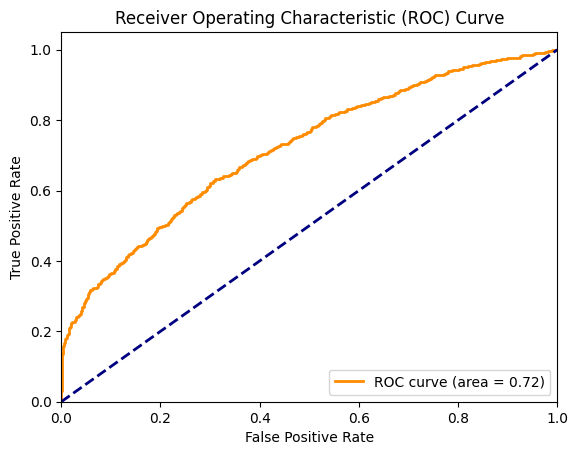

In [14]:
input_shape = (224, 224)
num_labels = 2
class CNN(nn.Module):
    def __init__(self, num_classes=num_labels):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * (input_shape[0] // 4) * (input_shape[1] // 4), 256)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)
    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu4(self.fc1(x))
        x = self.fc2(x)
        return x
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10
true_labels = []
predicted_probs = []
for epoch in range(num_epochs):
    model.train()
    total_correct_train = 0
    total_samples_train = 0
    total_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs, 1)
        total_samples_train += labels.size(0)
        total_correct_train += (predicted == labels).sum().item()
        total_loss += loss.item()
    train_accuracy = total_correct_train / total_samples_train
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Accuracy: {train_accuracy:.4f}, Train Loss: {avg_loss:.4f}")
model.eval()
with torch.no_grad():
    total_correct_test = 0
    total_samples_test = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_samples_test += labels.size(0)
        total_correct_test += (predicted == labels).sum().item()
        true_labels.extend(labels.numpy())
        predicted_probs.extend(torch.softmax(outputs, dim=1)[:, 1].numpy())
    test_accuracy = total_correct_test / total_samples_test
print(f"Final Test Accuracy: {test_accuracy:.4f}")

fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix

def top1_accuracy(true_labels, predicted_labels):
    correct = 0
    total = len(true_labels)
    for true, pred in zip(true_labels, predicted_labels):
        if true == pred:
            correct += 1
    return correct / total

predicted_labels = [1 if prob > 0.5 else 0 for prob in predicted_probs]

cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

top1_acc = top1_accuracy(true_labels, predicted_labels)
print(f"Top-1 Accuracy: {top1_acc:.4f}")

Confusion Matrix:
[[537 474]
 [254 758]]
Top-1 Accuracy: 0.6401


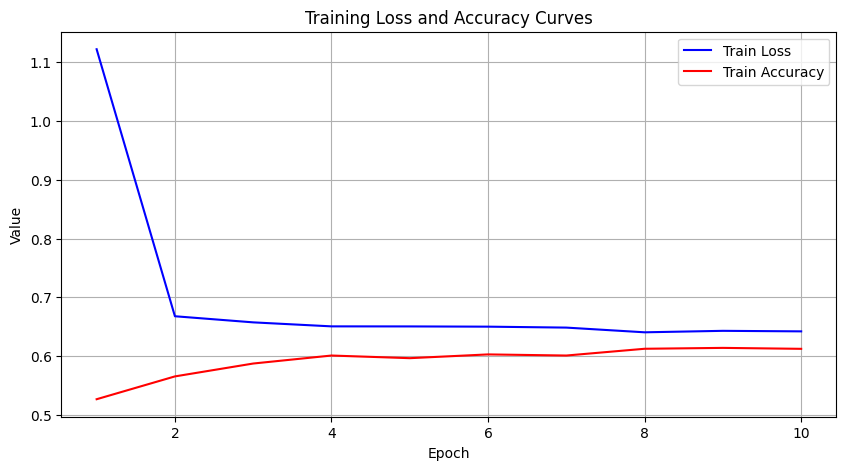

In [19]:
train_losses = [1.1219, 0.6678, 0.6574, 0.6506, 0.6505, 0.6501, 0.6485, 0.6405, 0.6430, 0.6421]
train_accuracies = [0.5267,0.5655, 0.5874,0.6010,0.5965,0.6029,0.6010,0.6125,0.6140, 0.6124]

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='blue')
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy Curves')
plt.legend()
plt.grid(True)
plt.show()